# Result Analysis

In [133]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

## Open Files

In [149]:
# Open the JSON file

input_data = {}

# path = './../ft_results/vit_b_32_ucmerced_landuse_results.csv'
path = './../ft_results/vit_b_16_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet50_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet18_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet18_ucmerced_landuse_results.jsonresnet18_ucmerced_landuse_results.csv'

df = pd.read_csv(path)

df.head()

,Experiment,Optimizer,Learning_Rate,Batch_Size,Accuracy,Precision,Recall,F1,Execution_Time,Fold_Number
0,44.0,AdamW,0.001,32.0,0.750000,0.765867,0.753833,0.751822,1794.489294,4.0
1,31.0,SGD,0.001,32.0,0.933333,0.931199,0.930867,0.928650,1896.408233,1.0
2,33.0,SGD,0.001,32.0,0.945238,0.946993,0.944431,0.943251,1891.289057,3.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37.0,Adam,0.001,32.0,0.754762,0.747948,0.755634,0.744285,1906.500394,2.0


### Data Shape

In [150]:
num_rows, num_cols = df.shape

print(f'Number of Rows: {num_rows}')
print(f'Number of Cols: {num_cols}')


Number of Rows: 106
Number of Cols: 10


### Single Best Experiment Fold (Accuracy)

In [151]:
max_index = df['Accuracy'].idxmax()


for col in df.columns:
    print(f'{col}: {df[col][max_index]}')

Experiment: 34.0
Optimizer: SGD
Learning_Rate: 0.001
Batch_Size: 32.0
Accuracy: 0.9476190476190476
Precision: 0.9489363918264172
Recall: 0.9504895336736768
F1: 0.9490774365350796
Execution_Time: 1970.5475194454195
Fold_Number: 4.0


### Best Experiment (Combined Folds) (Accuracy)

In [152]:
df_avg = df.groupby(['Optimizer', 'Learning_Rate', 'Batch_Size']).mean().reset_index()

max_acc_idx = df_avg['Accuracy'].idxmax()

# print(max_acc_idx)

for col in df_avg.columns:
    print(f'{col}: {df_avg[col][max_acc_idx]}')

# df_avg.head()

Optimizer: SGD
Learning_Rate: 0.0001
Batch_Size: 16.0
Experiment: 33.0
Accuracy: 0.9375
Precision: 0.9371958295513146
Recall: 0.9398666148148574
F1: 0.936651221630739
Execution_Time: 2128.592323422432
Fold_Number: 3.0


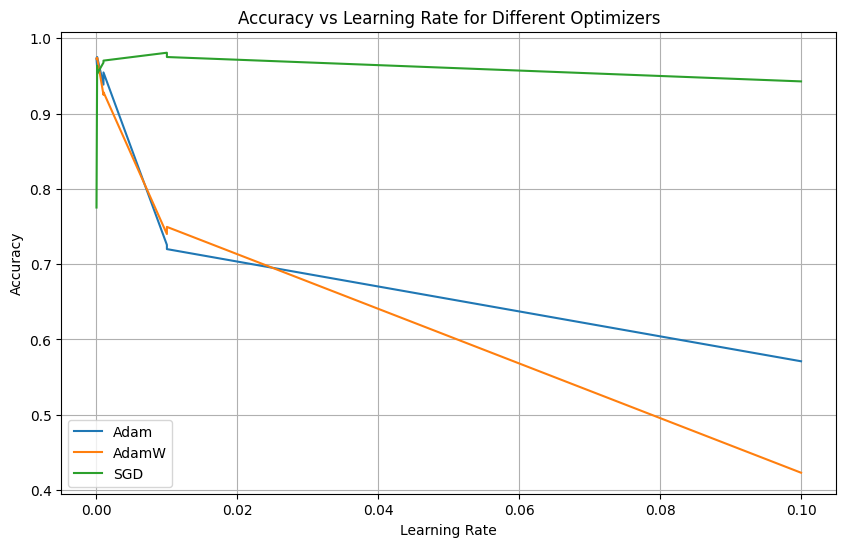

In [138]:
# Get the unique optimizers
optimizers = df_avg['Optimizer'].unique()

# Create the plot
plt.figure(figsize=(10, 6))

for optimizer in optimizers:
    optimizer_data = df_avg[df_avg['Optimizer'] == optimizer]
    plt.plot(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=optimizer)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers')
plt.legend()
plt.grid()
plt.show()

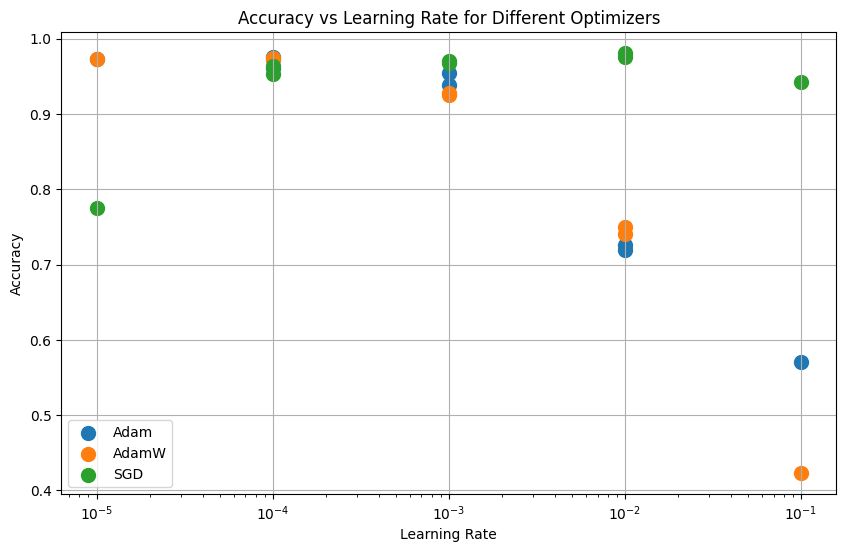

In [139]:
optimizers = df_avg['Optimizer'].unique()

# Create the plot
plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    optimizer_data = df_avg[df_avg['Optimizer'] == optimizer]
    plt.scatter(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=optimizer, s=100)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.legend()
plt.grid()
plt.show()

Optimizer	Learning Rate	Accuracy
--------------------------------------------------
Adam	0.0000	0.973
AdamW	0.0000	0.973
SGD	0.0100	0.981
--------------------------------------------------


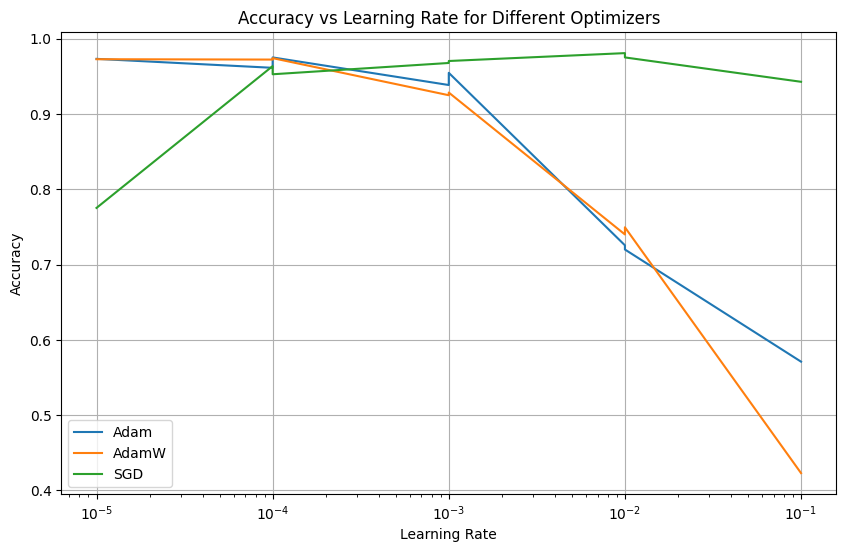

In [140]:
optimizers = df_avg['Optimizer'].unique()

print("Optimizer\tLearning Rate\tAccuracy")
print("-" * 50)

for i, optimizer in enumerate(optimizers):
    optimizer_data = df_avg[(df_avg['Optimizer'] == optimizer) & (df_avg['Batch_Size'] == 16.0)]
    max_acc_idx = optimizer_data['Accuracy'].idxmax()
    max_acc = optimizer_data['Accuracy'][max_acc_idx]
    learning_rate = optimizer_data['Learning_Rate'][max_acc_idx]
    print(f"{optimizer}\t{learning_rate:.4f}\t{max_acc:.3f}")

print("-" * 50)

# Create the plot
plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    optimizer_data = df_avg[df_avg['Optimizer'] == optimizer]
    plt.plot(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=optimizer)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.legend()
plt.grid()
plt.show()

In [141]:

# Assuming your dataframe is already grouped and has the following structure:
# df_avg = df.groupby(['Optimizer', 'Learning_Rate', 'Batch_Size']).mean().reset_index()

# Get the unique optimizers, learning rates, and batch sizes
optimizers = df_avg['Optimizer'].unique()
learning_rates = df_avg['Learning_Rate'].unique()
batch_sizes = df_avg['Batch_Size'].unique()

# Print the values and their corresponding learning rates, batch sizes, and optimizers
print("Optimizer\tLearning Rate\tBatch Size\tAccuracy")
print("-" * 80)

for optimizer in optimizers:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            optimizer_data = df_avg[(df_avg['Optimizer'] == optimizer) & (df_avg['Learning_Rate'] == learning_rate) & (df_avg['Batch_Size'] == batch_size)]
            max_acc_idx = optimizer_data['Accuracy'].idxmax()
            max_acc = optimizer_data['Accuracy'][max_acc_idx]
            print(f"{optimizer}\t{learning_rate:.4f}\t{batch_size}\t{max_acc:.3f}")

print("-" * 80)

# Create the plot
plt.figure(figsize=(10, 6))

for optimizer in optimizers:
    for batch_size in batch_sizes:
        optimizer_data = df_avg[(df_avg['Optimizer'] == optimizer) & (df_avg['Batch_Size'] == batch_size)]
        plt.plot(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=f"{optimizer} (Batch Size: {batch_size})")

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers and Batch Sizes')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.legend()
plt.grid()
plt.show()

Optimizer	Learning Rate	Batch Size	Accuracy
--------------------------------------------------------------------------------
Adam	0.0000	16	0.973


ValueError: attempt to get argmax of an empty sequence